# View Results of LibTadTran in Thermal mode

- author : Sylvie Dagoret-Campagne
- afflilation : LAL/IJCLab, CNRS
- creation date : January 24th 2020
- update : 
 

In [1]:
import os
import re
import numpy as np

In [2]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8') # vary depending on your lang/locale

'en_US.UTF-8'

In [3]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.colors as colors
import matplotlib.cm as cmx

In [4]:
import numpy as np
import re
import time
from datetime import datetime,date
import dateutil.parser

In [5]:
from scipy import signal

In [6]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(16,8)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points 

# Start

In [7]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

# Comparison without clouds

In [8]:
files =["UVSPEC_LOWTRAN_THERMAL_NOCLOUDS.OUT","UVSPEC_REPTRAN_THERMAL_NOCLOUDS.OUT","UVSPEC_REPTRAN_THERMAL_FINE_NOCLOUDS.OUT"]

In [9]:
tags = ["lowtran","reptran-coarse","reptran-fine"]

In [10]:
col = ["b","r","grey"]

In [11]:
NBC=len(files)

In [12]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=NBC)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NBC), alpha=1)

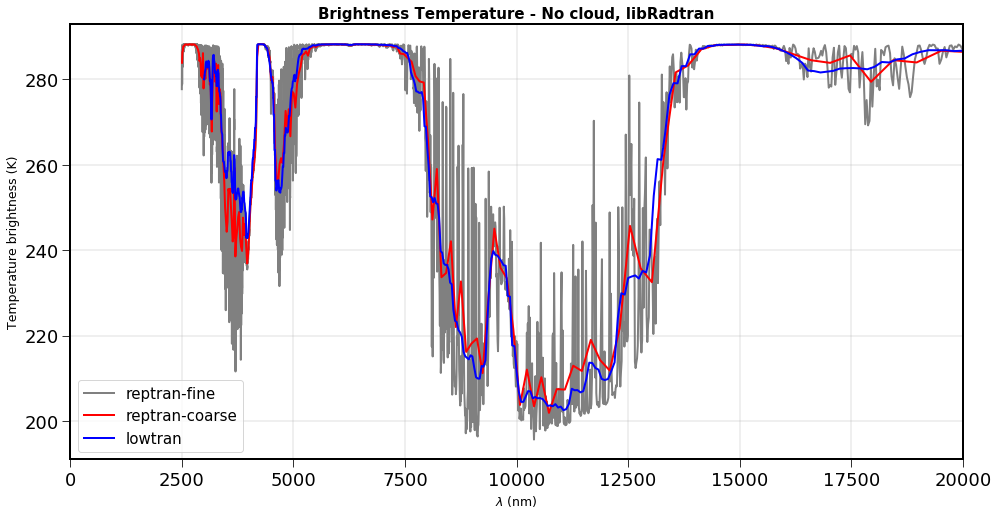

In [13]:
for ii in np.arange(NBC):
    index=NBC-ii-1
    file=files[index]
    arr=np.loadtxt(file)
    wl=arr[:,0]
    out=arr[:,1]
    if index == 3 :
        plt.plot(wl,out,":",color=col[index],label=tags[index])
    else:
        plt.plot(wl,out,"-",color=col[index],label=tags[index],lw=2)
plt.grid()
plt.title("Brightness Temperature - No cloud, libRadtran")
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("Temperature brightness (K)")
plt.xlim(0,20000)
plt.legend(loc="best")
figfilename=string_date+"_IRSkyBrighness_NOCLOUDS.png"
plt.savefig(figfilename)

# Comparison with clouds

In [14]:
files = ["UVSPEC_LOWTRAN_THERMAL_NOCLOUDS.OUT","UVSPEC_LOWTRAN_THERMAL_ICFUCLOUDS.OUT","UVSPEC_LOWTRAN_THERMAL_ICBAUMCLOUDS.OUT","UVSPEC_LOWTRAN_THERMAL_ICYANGCLOUDS.OUT"]	


In [15]:
tags = ["no cloud","Ice cloud : Fu param","Ice cloud : Baum param","Ice cloud : Yang param"]

In [16]:
col = ["k","b","g","r"]

In [17]:
NBC=len(files)

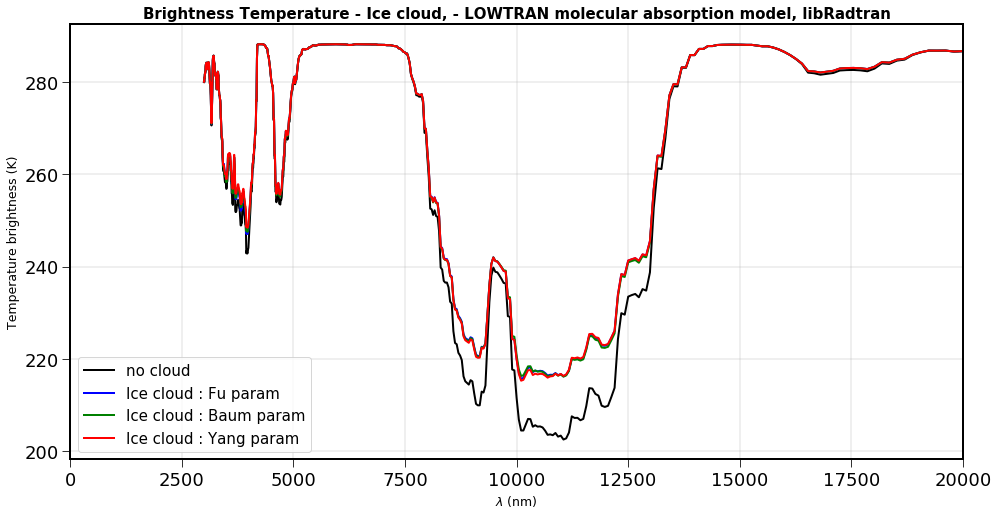

In [18]:
for ii in np.arange(NBC):
    index=ii
    file=files[index]
    arr=np.loadtxt(file)
    wl=arr[:,0]
    out=arr[:,1]
    plt.plot(wl,out,"-",color=col[index],label=tags[index],lw=2)
plt.grid()
plt.title("Brightness Temperature - Ice cloud, - LOWTRAN molecular absorption model, libRadtran")
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("Temperature brightness (K)")
plt.xlim(0,20000)
plt.legend(loc="best")
figfilename=string_date+"_IRSkyBrighness_ICCLOUDS.png"
plt.savefig(figfilename)